## Machine Learning Engineering

By AI-eX

In [1231]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [1232]:
#Importation de la base de données:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1233]:
#Vérifier les valeurs nuls par colonne
for c in df.columns: 
    print(f"Missing values for {c}: {df[c].isnull().sum()}")

Missing values for Pregnancies: 0
Missing values for Glucose: 0
Missing values for BloodPressure: 0
Missing values for SkinThickness: 0
Missing values for Insulin: 0
Missing values for BMI: 0
Missing values for DiabetesPedigreeFunction: 0
Missing values for Age: 0
Missing values for Outcome: 0


<AxesSubplot:title={'center':'Correlation Matrix'}>

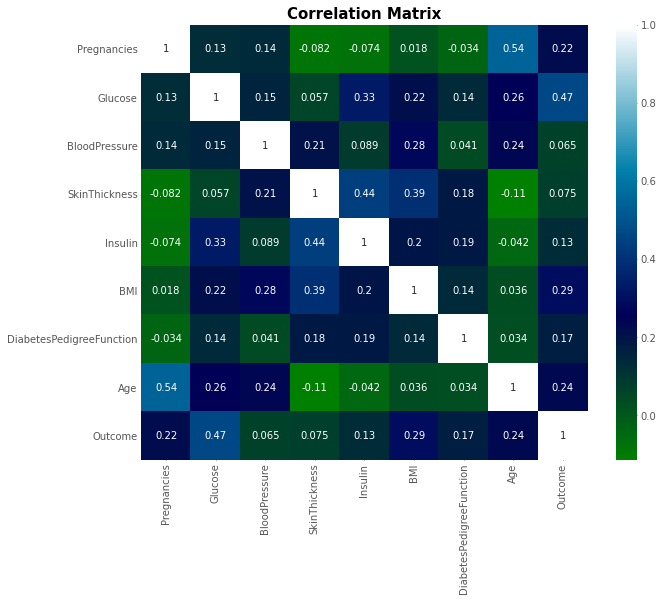

In [1234]:
plt.figure(figsize=(10,8), edgecolor="black")
plt.title("Correlation Matrix", color="black", fontweight='bold',
         fontsize=15)
corr = df.corr()
sns.heatmap(corr, cmap ='ocean', annot=True, cbar=True)

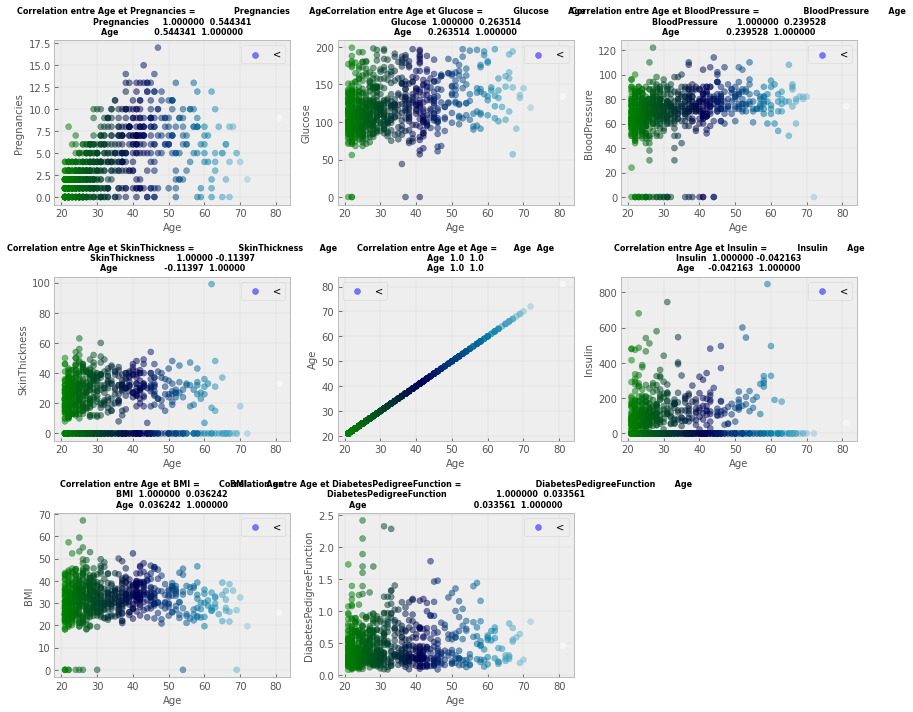

In [1235]:
col = {"Pregnancies":df.Pregnancies,"Glucose":df.Glucose,"BloodPressure":df.BloodPressure,
       "SkinThickness":df.SkinThickness,"Age":df.Age,"Insulin":df.Insulin, "BMI":df.BMI, 
       "DiabetesPedigreeFunction":df.DiabetesPedigreeFunction}

liste = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Age","Insulin", "BMI", "DiabetesPedigreeFunction"]

n_rows = 3
n_cols = 3
pos = 1

plt.figure(figsize=(12,10))

for i in liste:
        plt.subplot(n_rows, n_cols, pos)
        plt.scatter(df.Age, df[i], c=df.Age, alpha=0.5, cmap='ocean', label="Correlation") 
        plt.title(f"Correlation entre Age et {i} = {df[[i,'Age']].corr()}", fontsize=8, fontweight='bold')
        plt.xlabel("Age", fontsize=10)
        plt.ylabel(f"{i}", fontsize=10)
        plt.legend(f"{df.corr}")
        plt.grid(True, lw=0.2)
        pos = pos + 1
        plt.tight_layout()
        


Text(0.5, 1.0, 'Correlation between Age and')

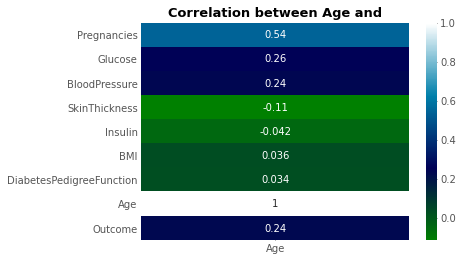

In [1236]:
corr_age = df.corr()[['Age']]
sns.heatmap(corr_age, annot=True, cbar=True, cmap='ocean')
plt.title("Correlation between Age and", fontsize=13, fontweight='bold')

##  1. Logistic Regression

In [1237]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error 

In [1239]:
X = df.drop(columns=['Outcome'], axis=1)
y = df.Outcome      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                   shuffle=True)

print("Dimension of X_train is :" + str(X_train.shape))
print("Dimension of X_test is :" + str(X_test.shape))
print("Dimension of y_train is :" + str(y_train.shape))
print("Dimension of y_test is :" + str(y_test.shape))

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
log_reg.predict_proba(X_test)[:10] # les 10 premiers lignes de probabilités

df_proba = pd.DataFrame({"Actual": y_test, "Predicted":log_reg.predict(X_test)}).head(10) 
df_proba
mean_squared_error(y_test,log_reg.predict(X_test))

Dimension of X_train is :(614, 8)
Dimension of X_test is :(154, 8)
Dimension of y_train is :(614,)
Dimension of y_test is :(154,)


0.2532467532467532

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

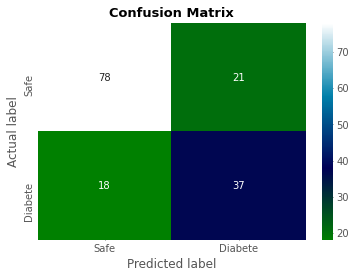

In [1240]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

ax = plt.subplot()

conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='ocean')

plt.title("Confusion Matrix", fontsize=13, fontweight='bold')
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

ax.xaxis.set_ticklabels(['Safe', 'Diabete']); 
ax.yaxis.set_ticklabels(['Safe', 'Diabete']);

plt.tight_layout

| Safe=0 | Diabete=1 |
| :---: | :---: |
| TN | FP |
| FN | TP |

### Classification Report

In [1241]:
target_names = ["Safe","Diabete"]
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Safe       0.81      0.79      0.80        99
     Diabete       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



- This parameter sums all the true positives and true negatives and divides them by the total number of instances. It provides an answer to the following question: of all the positive and negative classes, how many of them were predicted correctly ?

$$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN}  $$

- Accuracy indicates the ratio of correct positive predictions to the total number of positive predictions. This parameter therefore answers the following question: of all the predicted positive records, how many are actually positive ?

$$ Précision = \frac{TP}{TP+FP}  $$

- Recall is a parameter that measures the number of correct positive predictions out of the total number of positive data. It answers the following question: of all the positive records, how many were correctly predicted ? 

$$ Recall = \frac{TP}{TP+FN}  $$

- The F1 score (or F-measure) is a harmonic mean of precision and recall.

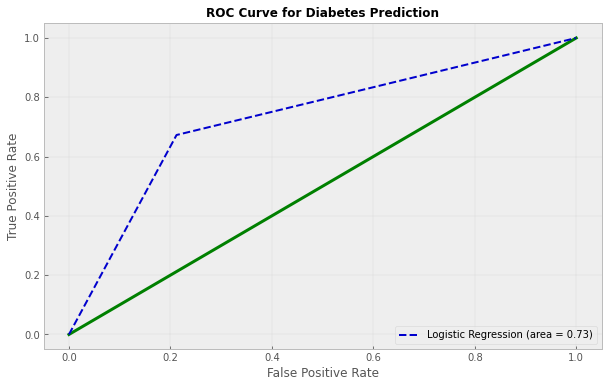

In [1242]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

plt.figure(figsize=(10,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k-', lw=3, color='green')

# Plot tpr against fpr
roc_auc = roc_auc_score(y_test, y_pred)

# Logistic Regression
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %roc_auc, color='mediumblue', lw=2, linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.grid(True, lw=0.2)
plt.title('ROC Curve for Diabetes Prediction', fontweight='bold', fontsize=12)
plt.show()

Text(145, 0.3, '<--False Positive (FP)-->')

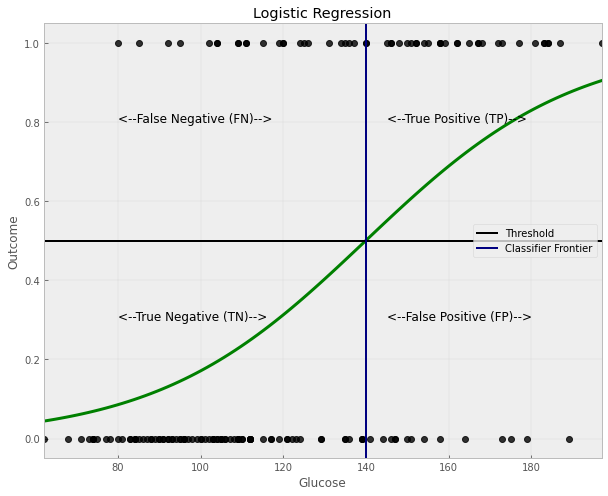

In [1243]:
glucose_frame = X_test.Glucose.to_frame()

plt.figure(figsize=(10,8))
sns.regplot(x=glucose_frame, y=y_test, data=df, logistic=True, ci=False, color='black', 
            line_kws={'color' : 'green'}) 
plt.grid(True, lw=0.2)
plt.title("Logistic Regression")
plt.axhline(y=0.5, label="Threshold")
plt.axvline(x=140, label="Classifier Frontier", color='navy')
plt.legend()

plt.text(80,0.3,"<--True Negative (TN)-->", fontsize=12)
plt.text(80,0.8,"<--False Negative (FN)-->", fontsize=12)
plt.text(145,0.8,"<--True Positive (TP)-->", fontsize=12)
plt.text(145,0.3,"<--False Positive (FP)-->", fontsize=12)


## 2. K-Nearest Neighbors (KNN)

In [1244]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(columns=["Outcome"], axis=1)
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

df_pred = pd.DataFrame({"Actual": y_test, "Predicted":y_pred})

print(f"Score on Training Set : {knn.score(X_train,y_train)}")
print("Score on Test Set:", str(knn.score(X_test,y_test)))

Score on Training Set : 0.7980456026058632
Score on Test Set: 0.6623376623376623


 Maximum Accuracy (Test set) is : 0.7792207792207793
 Minimum MSE (Test set) is : 0.22077922077922077


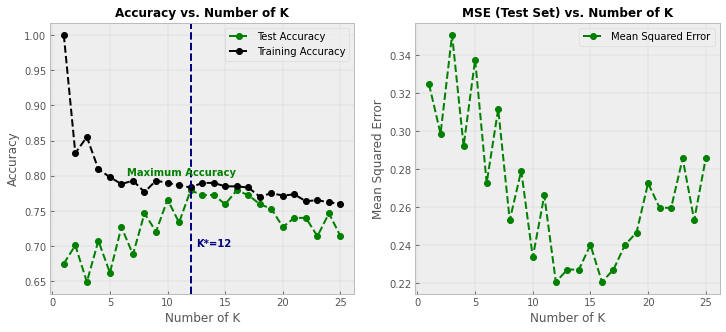

In [1245]:
from sklearn.metrics import mean_squared_error 

#Cherchons le meilleur accuracy pour le meilleur K
#creation de liste pour stocker les valeurs de accuracy pour training set et test set
training_accuracy = []
test_accuracy = []

for k in np.arange(1,26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn.predict(X_test)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
    
    

plt.figure(figsize=(12,5), edgecolor='black')
plt.subplot(1,2,1)
plt.plot(np.arange(1,26), test_accuracy, label='Test Accuracy', color='green', marker='o', linestyle='--')
plt.plot(np.arange(1,26), training_accuracy, label='Training Accuracy', color='black', marker='o', linestyle='--')
plt.title("Accuracy vs. Number of K", fontweight='bold', fontsize=12)
plt.ylabel("Accuracy")
plt.xlabel("Number of K")
plt.legend()
plt.grid(True, lw=0.3)
print(f" Maximum Accuracy (Test set) is : {max(test_accuracy)}")
plt.text(6.5,0.8,'Maximum Accuracy', fontweight='bold', color='green')
plt.axvline(x=12, color='navy', linestyle='--')
plt.text(12.5,0.70,'K*=12', fontweight='bold', color='navy')

mse_list = []

for k in np.arange(1,26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    
#Cherchons le meilleur MSE pour le meilleur K:

plt.subplot(1,2,2)
plt.plot(np.arange(1,26), mse_list, label='Mean Squared Error', color='green', marker='o', linestyle='--')
plt.title("MSE (Test Set) vs. Number of K", fontweight='bold', fontsize=12)
plt.ylabel("Mean Squared Error")
plt.xlabel("Number of K")
plt.legend()
plt.grid(True, lw=0.3)
print(f" Minimum MSE (Test set) is : {min(mse_list)}")
plt.show()

### Cross-Validation with KNN

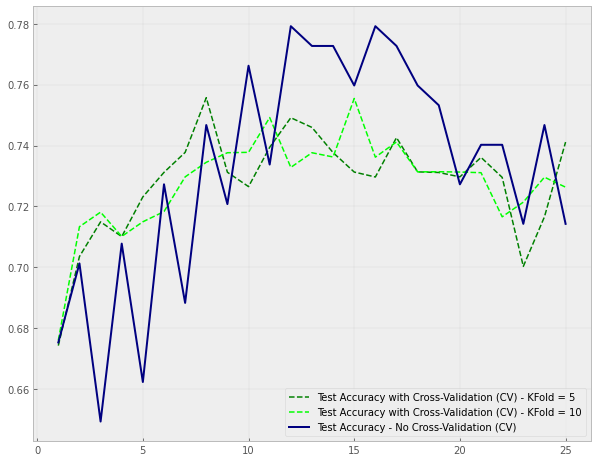

In [1246]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error


test_accuracy_CV10 = []

for k in np.arange(1,26):
    kf = KFold(n_splits=10, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')
    
    test_accuracy_CV10.append(np.mean(cv_scores))
    
test_accuracy_CV5 = []

for k in np.arange(1,26):
    kf = KFold(n_splits=5, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')
    
    test_accuracy_CV5.append(np.mean(cv_scores))
    
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,26), test_accuracy_CV5, label="Test Accuracy with Cross-Validation (CV) - KFold = 5", 
         color='green', linestyle='--',lw=1.5)
plt.plot(np.arange(1,26), test_accuracy_CV10, label="Test Accuracy with Cross-Validation (CV) - KFold = 10", 
         color='lime', linestyle='--',lw=1.5)
plt.plot(np.arange(1,26), test_accuracy, label="Test Accuracy - No Cross-Validation (CV)", color='Navy')
plt.legend()
plt.grid(True, lw=0.2)

### GridSearch CV

In [1247]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

kf=KFold(n_splits=10, shuffle=True)
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1,26)}
cv = GridSearchCV(knn, param_grid, cv=kf)

cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])})

In [1248]:
print(cv.best_score_, "\n", cv.best_params_)

0.7589106292966684 
 {'n_neighbors': 14}


## 3. K-Means Clustering

In [1249]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df_kmeans = df.drop("Outcome", axis=1)

model = KMeans(n_clusters=2)
model.fit(df_kmeans)
labels = model.predict(df_kmeans)


centroids = model.cluster_centers_

model.inertia_

5142376.455984389

In [1250]:
labels = model.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 261 out of 768 samples were correctly labeled.


<function matplotlib.pyplot.show(close=None, block=None)>

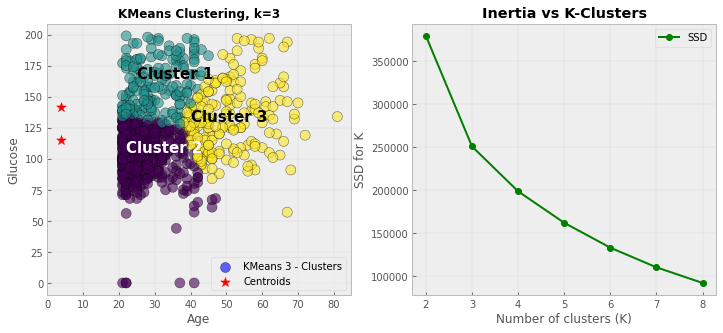

In [1251]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# On choisit de procéder avec seulement deux variables : Age et Glucose
df_KMeans = pd.DataFrame({"Age": df.Age, "Glucose": df.Glucose})

# On standardise les données en retrancher la moyenne et en divisant par l'écart-type
scale=StandardScaler()

#On peut aussi définir la fonction StandardScaler: 
def standardscaler(observation):
    StScaler = (observation-np.mean(df.Glucose))/(np.std(df.Glucose))
    print(StScaler)
    
#standardscaler()
df_scaled = scale.fit_transform(df_KMeans)

#Modèle KMeans:
model = KMeans(n_clusters=3, random_state=0)
clusters = model.fit_predict(df_scaled)

plt.figure(figsize=(12,5), edgecolor='black')
plt.subplot(1,2,1)
plt.scatter(df_KMeans.Age, df_KMeans.Glucose, c=clusters, s=100, cmap='viridis', 
            label="KMeans 3 - Clusters", edgecolors='black',
           alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, color='red', label="Centroids")
plt.grid(True, lw=0.2)
plt.title("KMeans Clustering, k=3", fontsize=12, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.text(25,165,"Cluster 1", color='black', fontweight='bold', fontsize=15)
plt.text(22,105,"Cluster 2", color='white', fontweight='bold',fontsize=15)
plt.text(40,130,"Cluster 3", color='black', fontweight='bold',fontsize=15)


plt.subplot(1,2,2)
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_KMeans)
    ssd.append(kmeans_model.inertia_)
plt.plot(range(2, 9), ssd, color="green", marker="o", label='SSD')
plt.title("Inertia vs K-Clusters", fontweight='bold')
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.grid(True, lw=0.2)
plt.legend()
plt.show

In [1252]:
# Ajout de la colonne des clusters dans la table df_kmeans
df_kmeans["labels_predicted"] = model.labels_

In [1253]:
centroids = model.cluster_centers_ # On définit les coordonnées des centroids (barycentre)
centroids = scale.inverse_transform(centroids) # Les coordonnées sont centrées-réduits : inverse standardisation

## Hierarchical Clustering 

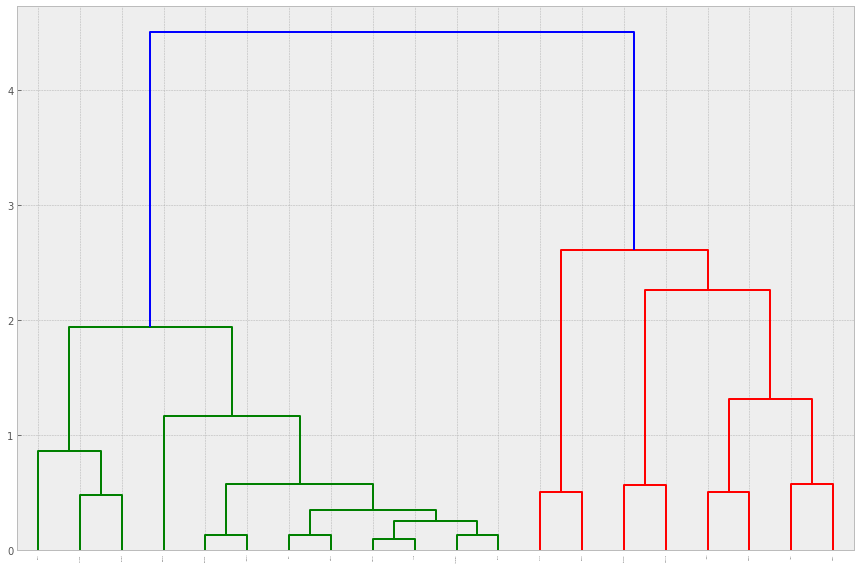

In [1254]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

lis=['Alex', 'Levana', 'Laura', 'Elvis', 'Gerald', 'Michel', 'Robert', 'Anna', 'Étienne',
                     'John', 'Fab','Lloyd', 'Henry','Maurice', 'Dany', 'Viviane', 'Amanda', 'Cathy', 'Jeffrey',
                     'Sally']
# Création des regroupements
plt.figure(figsize=(15,10))
mergings = linkage(df_scaled[:20], method='complete', metric='euclidean')

dendrogram(mergings, leaf_rotation=90,
          leaf_font_size=2, labels=lis)
plt.show()

In [1255]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


La moyenne de Pregnancies est :3.8450520833333335
La moyenne de Glucose est :120.89453125
La moyenne de BloodPressure est :69.10546875
La moyenne de SkinThickness est :20.536458333333332
La moyenne de Insulin est :79.79947916666667
La moyenne de BMI est :31.992578124999977
La moyenne de DiabetesPedigreeFunction est :0.4718763020833327
La moyenne de Age est :33.240885416666664


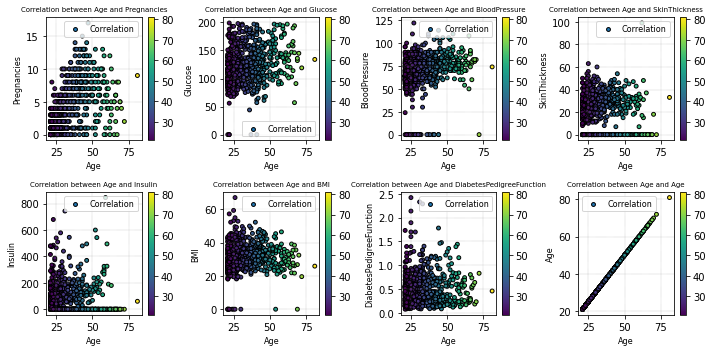

In [1256]:
liste_var = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction',
            'Age']

n_rows =2
n_cols=4
pos =1
plt.figure(figsize=(10,5))
for i in liste_var:
    plt.style.use('default')
    plt.subplot(n_rows,n_cols,pos)
    sc = plt.scatter(df.Age, df[i], edgecolor='black',
               c=df.Age, label=f"Correlation", s=15)
    plt.title(f"Correlation between Age and {i}", fontsize=7)
    plt.xlabel("Age", fontsize=8)
    plt.ylabel(f"{i}", fontsize=8)
    plt.grid(True, lw=0.4, color='Gray', linestyle = 'dotted')
    plt.legend(fontsize=8)
    plt.colorbar(sc)
    pos+=1
    plt.tight_layout()
    
    
for i in liste_var:
    print(f"La moyenne de {i} est :" + str(np.mean(df[i])))

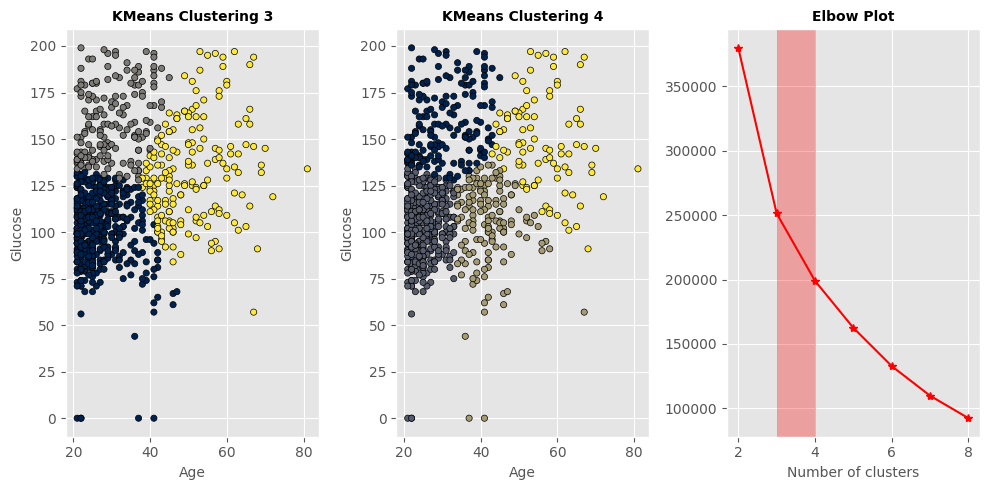

In [1257]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Choosing the variables from the original dataset
df_kmeans = pd.DataFrame({'Age':df.Age, 'Glucose':df.Glucose})

#Scale the data by using StandardScaler() from sklearn
scale = StandardScaler()
scaled = scale.fit_transform(df_kmeans)

n_rows=1
n_cols=3
pos=1
a=3

plt.figure(figsize=(10,5), edgecolor='black')
for c in np.arange(3,5,1):
    #Build the KMeans Clustering Model
    model = KMeans(n_clusters = c, algorithm='auto', random_state=0)
    #Predict the clusters, you can also use model.labels_
    clusters = model.fit_predict(scaled)
    # Add the clusters output to our dataframe under the name of clusters
    df_kmeans['clusters'] = model.labels_
    # Plot the clusters do not forget to use c=clusters to display clusters into the chart 
    plt.style.use('ggplot')
    plt.subplot(n_rows,n_cols,pos)
    plt.scatter(df_kmeans.Age, df_kmeans.Glucose, c=df_kmeans.clusters,
           s=20, edgecolor='black', cmap='cividis')
    plt.xlabel("Age", fontsize=10)
    plt.ylabel("Glucose", fontsize=10)
    plt.title(f"KMeans Clustering {a}", fontweight='bold', fontsize=10)
    pos+=1
    a+=1
    
#Find the best number of clusters by choosing ( the elbow)
best_k =[]
plt.subplot(1,3,3)
for k in np.arange(2,9) :
    model = KMeans(n_clusters=k, verbose=0, random_state=0)
    model.fit(df_kmeans)
    best_k.append(model.inertia_)
plt.plot(np.arange(2,9), best_k, linestyle='solid', marker='*', lw=1.5,
        color='red')
plt.title('Elbow Plot', fontsize=10, fontweight='bold')
plt.xlabel("Number of clusters", fontsize=10)
plt.axvspan(3,4, color='red', alpha=0.3)
plt.tight_layout()
plt.show()

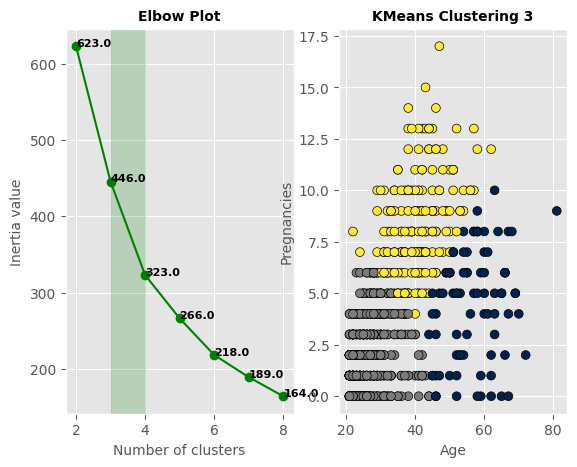

In [1258]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Dataset
df = pd.DataFrame({'Age':df.Age, 'Pregnancies':df.Pregnancies})

#Scale the data
scale=StandardScaler()
scaled=scale.fit_transform(df)

# Find the best number of clusters
inertia_list = []
k=np.arange(2,9)
plt.figure(figsize=(10,5), edgecolor='black')
plt.subplot(1,3,1)
for c in np.arange(2,9):
    model=KMeans(n_clusters=c)
    model.fit(scaled)
    inertia_list.append(model.inertia_)

plt.style.use('ggplot')

plt.plot(k, inertia_list, color='green', marker='o')
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Inertia value', fontsize=10)
plt.title('Elbow Plot', fontsize=10, fontweight='bold')

for c, name in zip(np.arange(2,9), np.around(inertia_list,0)):
    plt.text(c, name, f'{name}', fontsize=8, fontweight='bold')

plt.axvspan(3,4, color='green', alpha=0.2)

# KMeans Clustering Model
model = KMeans(n_clusters=3)
model.fit(scaled)
df['cluster_2'] = model.fit_predict(scaled)
centroids=model.cluster_centers_
plt.subplot(1,3,2)
plt.scatter(df.Age, df.Pregnancies, c=df.cluster_2, cmap='cividis', s=40, edgecolor='black')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Pregnancies', fontsize=10)
plt.title('KMeans Clustering 3', fontweight='bold', fontsize=10)
plt.show()

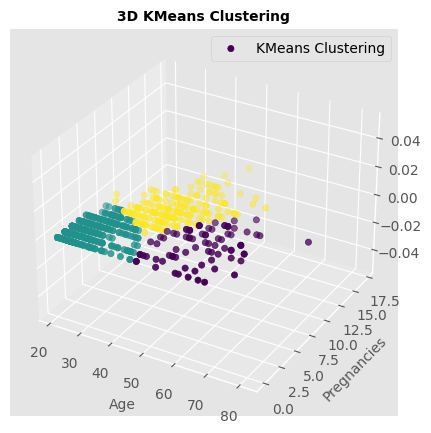

In [1259]:
fig=plt.figure(figsize=(5,7))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df.Age,df.Pregnancies,c=df.cluster_2, label='KMeans Clustering')
ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('Pregnancies', fontsize=10)
ax.set_title('3D KMeans Clustering', fontsize=10, fontweight='bold')
ax.legend()

## Hierarchical Clustering

<function matplotlib.pyplot.show(close=None, block=None)>

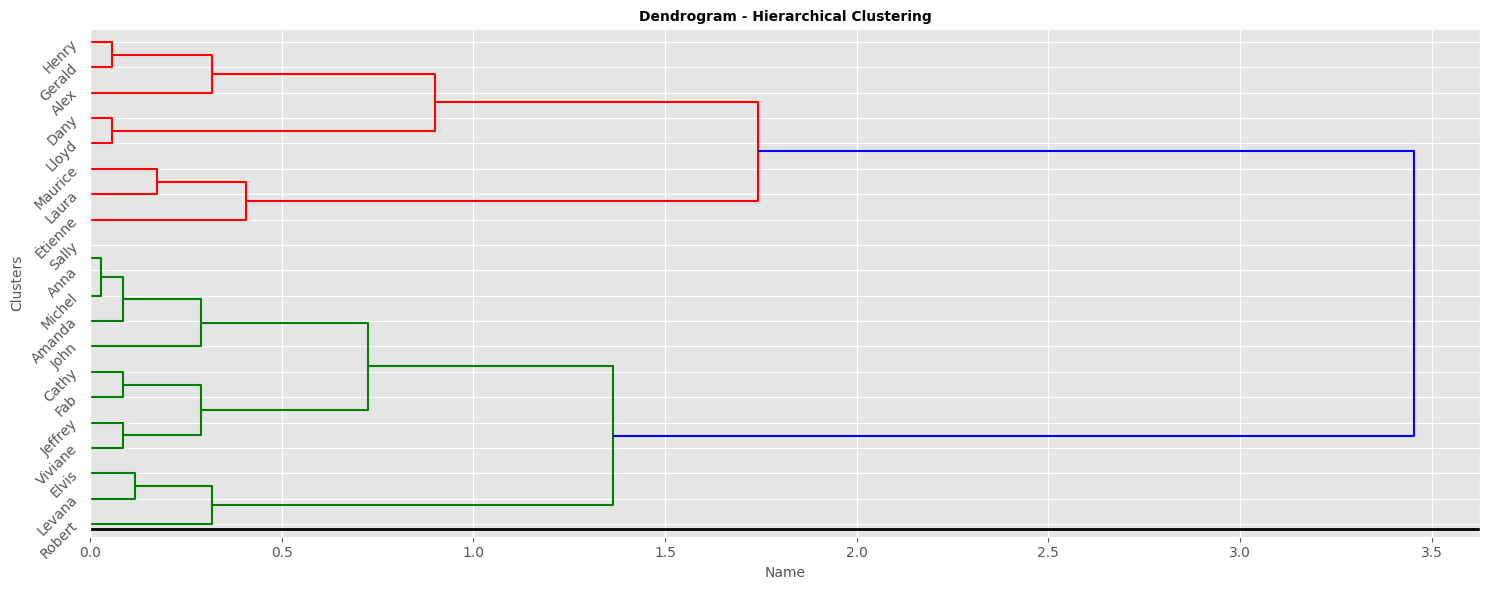

In [1260]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer
from scipy.cluster.hierarchy import linkage, dendrogram

#Import dataset
df=pd.read_csv('diabetes.csv')

#Keep only the first 20 observations in df
df = df.iloc[:20]
#Create a new column called Name
df['Name'] = ['Alex', 'Levana', 'Laura', 'Elvis', 'Gerald', 'Michel', 'Robert', 'Anna', 'Étienne',
                     'John', 'Fab','Lloyd', 'Henry','Maurice', 'Dany', 'Viviane', 'Amanda', 'Cathy', 'Jeffrey',
                     'Sally']
list_name = ['Alex', 'Levana', 'Laura', 'Elvis', 'Gerald', 'Michel', 'Robert', 'Anna', 'Étienne',
                     'John', 'Fab','Lloyd', 'Henry','Maurice', 'Dany', 'Viviane', 'Amanda', 'Cathy', 'Jeffrey',
                     'Sally']

#drop Outcome from df
#df = df.drop(['Outcome', 'Name'], axis=1)
df = pd.DataFrame({ 'Glucose':df.Glucose})
#Scale
scale = StandardScaler()
df_scaled = scale.fit_transform(df)

#Hierarchical Clustering Model
merging = linkage(df_scaled, method='complete', metric='euclidean')
plt.figure(figsize=(15,6))
#Dendrogram# 
dendrogram = dendrogram(merging,
                       leaf_rotation=45,
                       leaf_font_size=10, 
                       labels=list_name,
                       show_leaf_counts=True,
                       orientation='right')
plt.title('Dendrogram - Hierarchical Clustering', fontsize=10, fontweight='bold')
plt.xlabel('Name', fontsize=10)
plt.ylabel('Clusters', fontsize=10)
plt.axhline(y=3, lw=2, color='black')
plt.tight_layout()
plt.show

## T distributed - Stochastic Neighbor Embedding (t-SNE)

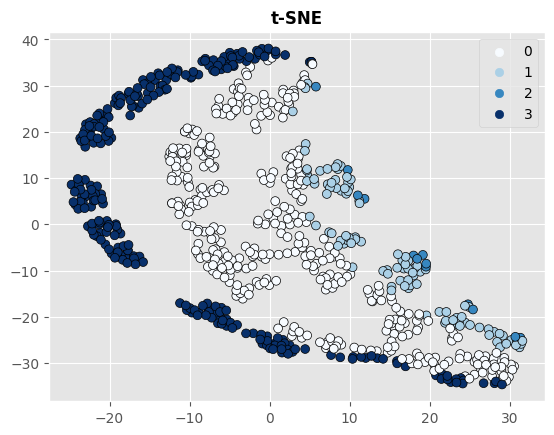

In [1261]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('diabetes.csv')
df = pd.DataFrame({'Age':df.Age,'Glucose':df.Glucose})

df['class'] = np.where(df.Age<=25,'Young',
                          (np.where(df.Age<=45, 'Adult',
                                (np.where(df.Age<=65, 'Old', 'Very Old')))))
le = LabelEncoder()
df['class'] = LabelEncoder().fit_transform(df['class'])

model = TSNE(learning_rate=200)

tsne_features=model.fit_transform(df)

xs=tsne_features[:,0]
ys=tsne_features[:,1]
#Young = 3, Adult = 1, Old = 2 and Very Old = 3
sns.scatterplot(xs,ys, hue=df['class'], palette='Blues', edgecolor='black', s=40)
plt.title('t-SNE', fontweight='bold', fontsize=12)
plt.legend()

## Principal Components Analysis (PCA)

In [1262]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('diabetes.csv')
df = df.iloc[:20]
df['Name'] = ['Alex', 'Levana', 'Laura', 'Elvis', 'Gerald', 'Michel', 'Robert', 'Anna', 'Étienne',
                     'John', 'Fab','Lloyd', 'Henry','Maurice', 'Dany', 'Viviane', 'Amanda', 'Cathy', 'Jeffrey',
                     'Sally']

df = pd.DataFrame({'Glucose':df.Glucose, 'BMI':df.BMI, 'Age':df.Age, 
                   'BloodPressure':df.BloodPressure, 'Name':df.Name})

df = df.set_index(df.Name)
df = pd.DataFrame({'Glucose':df.Glucose, 'BMI':df.BMI, 'Age':df.Age, 
                   'BloodPressure':df.BloodPressure})
df;

In [1263]:
# We have now our dataset, let's scale the data
from sklearn. preprocessing import StandardScaler

def scaler_data(X):
    mean = np.mean(X) # We compute the mean for each column
    std = np.std(X) # We compute the standard deviation for each column
    scaled = (X-mean)/std # Standardization of the data
    return scaled

df_scaled = scaler_data(df)

# Principal Components Analysis
model = PCA()

pca_loadings = pd.DataFrame(PCA().fit(df_scaled).components_.T, index=df_scaled.columns, 
                 columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Glucose,0.525007,-0.579364,-0.057694,0.620786
BMI,-0.400043,-0.647715,-0.564703,-0.318656
Age,0.620754,-0.227036,0.224683,-0.715986
BloodPressure,0.423080,0.439610,-0.792022,-0.021135


In [1264]:
#Compute the principal components
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), index=df_scaled.index, 
                     columns = ['PC1', 'PC2', 'PC3', 'PC4'])
df_pca

,PC1,PC2,PC3,PC4
Name,,,,
Alex,1.031170,-0.569735,-0.260541,-0.558516
Levana,-0.774563,1.249673,0.073545,-0.247377
Laura,0.880574,-0.225434,0.189517,1.568137
Elvis,-1.326821,1.280122,-0.222037,0.407609
Gerald,-1.005308,-1.248815,-0.156289,0.025465
Michel,-0.181945,0.955328,-0.186737,0.401695
Robert,-1.608475,0.889111,0.218790,-0.192359
Anna,-1.892391,-0.951311,1.511607,0.179915
Étienne,2.041146,-1.274960,-0.034759,0.240741


[2.12842652 1.06726421 0.74170526 0.27313032]
[0.5055013  0.25347525 0.176155   0.06486845]


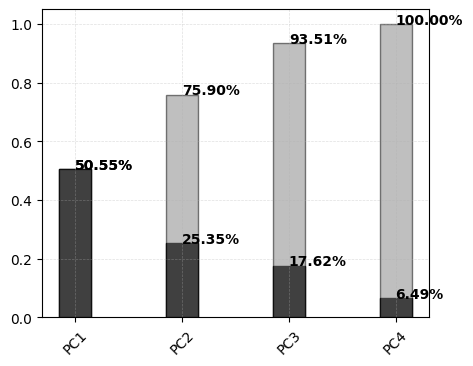

In [1265]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

plt.style.use('default')
plt.figure(figsize=(5,4))
plt.bar(df_pca.columns, pca.explained_variance_ratio_, color='black', edgecolor='black',
       width=0.3)
plt.bar(df_pca.columns, np.cumsum(pca.explained_variance_ratio_), color='gray', edgecolor='black' ,alpha=0.5,
       width=0.3)
plt.xticks(rotation=45)
plt.grid(linestyle='--', lw=0.5, alpha=0.4)

for c, ratio in zip(df_pca.columns, pca.explained_variance_ratio_):
    plt.text(c, ratio, f'{ratio:.2%}', fontweight='bold')
    
for c, ratio in zip(df_pca.columns, np.cumsum(pca.explained_variance_ratio_)):
    plt.text(c, ratio, f'{ratio:.2%}', fontweight='bold')

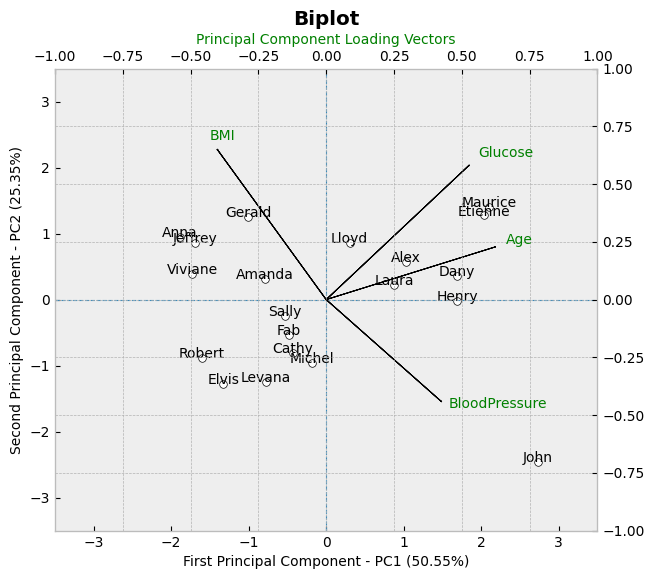

In [1266]:
def biplot(data, loadings):
    plt.style.use('bmh')
    fig , ax1 = plt.subplots(figsize=(7,6))

    ax1.set_xlim(-3.5,3.5)
    ax1.set_ylim(-3.5,3.5)
    ax1.set_ylabel(f"Second Principal Component - PC2 ({pca.explained_variance_ratio_[1]:.2%})", fontsize=10)
    ax1.set_xlabel(f"First Principal Component - PC1 ({pca.explained_variance_ratio_[0]:.2%})", fontsize=10 )
    ax1.set_title("Biplot", fontweight='bold')
    ax1.grid(False)
    
    ax1.scatter(data.PC1, -data.PC2, s=30, edgecolor='black', color='white')

    # Plot Principal Components 1 and 2
    for i in data.index:
        ax1.annotate(i, (data.PC1.loc[i], -data.PC2.loc[i]), ha='center', color='black', fontsize=10)
    
    ax1.hlines(0,-3.5,3.5, linestyle='--', lw=0.8)
    ax1.vlines(0,-3.5,3.5, linestyle='--', lw=0.8)
    ax2 = ax1.twinx().twiny()


    ax2.set_ylim(-1,1)
    ax2.set_xlim(-1,1)
    ax2.set_xlabel("Principal Component Loading Vectors", fontsize=10, color='green')

    a=1.07
    for i in loadings[['V1','V2']].index:
        ax2.annotate(i, (loadings['V1'].loc[i]*a, -loadings['V2'].loc[i]*a), color='green')

        ax2.arrow(0,0,loadings.V1[0], -loadings.V2[0], color='black')
        ax2.arrow(0,0,loadings.V1[1], -loadings.V2[1], color='black')
        ax2.arrow(0,0,loadings.V1[2], -loadings.V2[2], color='black')
        ax2.arrow(0,0,loadings.V1[3], -loadings.V2[3], color='black');
        
biplot(df_pca, pca_loadings)